<a href="https://colab.research.google.com/github/Anyaoma/modernpython/blob/master/Logistic_regression%3B_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The return from any investment is a function of the uncertainty or risk that accompanies the investment.

An equity investment implies assuming the company's business risk, while a bond investment implies assuming the default risk.

Hence, To the extent that specific risk characteristics predict returns, identifying and forecasting the behavior of these risk factors becomes a primary focus when designing an investment strategy.

In [ ]:
#IMPORT NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import yfinance as yfin
from scipy.stats import spearmanr
from scipy.stats import pearsonr

yfin.pdr_override()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import linear_model

In [ ]:
end_date = datetime.date(2023,1,1)
start_date = datetime.date(2005,1,1)

In [ ]:
def load_financial_data(start,end,output_file):
    try:
        df = pd.read_pickle(output_file)
        print('File data found...reading GOOG data')
    except FileNotFoundError:
        print('File not found...downloading the GOOG data')
        df = pd.DataFrame(web.DataReader(['GOOG'], start, end))
        df.to_pickle(output_file)

    return df


In [ ]:
# def create_classification_trading_condition(df):
#     df['Open-Close'] = df.Open - df.Close
#     df['High-Low'] = df.High - df.Low
#     lags = 5

#     cols = []
#     for lag in range(1, lags + 1):
#     col = f'lag_{lag}'
#     df[col] = df['Close'].shift(lag)
#     cols.append(col)

#     df = df.dropna()
#     X = df[['Open-Close', 'High-Low']]
#     Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
#     df['y'] = Y

#     return (df, X, Y)

In [ ]:
def create_classification_trading_condition(df):
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df['return'] = np.log(df['Close'] / df['Close'].shift(1))
    df = df.dropna()
    lags = 5

    cols = []
    for lag in range(1, lags + 1):
        col = f'lag_{lag}'
        df[col] = df['return'].shift(lag)
        cols.append(col)
        df.dropna(inplace=True)



    X = df[['Open-Close', 'High-Low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
    Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
    #Y = np.where(df['return']>0, 1, -1)

    #Y = df['return']


    return (df, X, Y)

In [ ]:
from sklearn.model_selection import train_test_split

def create_train_split_group(X, Y, split_ratio=0.8):
    return train_test_split(X, Y, shuffle=False, train_size=split_ratio)

In [ ]:
def calculate_return(df, split_value, symbol):
    cum_goog_return = df[split_value:]['%s_Returns' % symbol].cumsum() * 100
    df['Strategy_Returns'] = df['%s_Returns' % symbol] * df['Predicted_Signal'].shift(1)
    return cum_goog_return

def calculate_strategy_return(df, split_value, symbol):
    cum_strategy_return = df[split_value:]['Strategy_Returns'].cumsum() * 100
    return cum_strategy_return

#cum_goog_return = calculate_return(goog_data, split_value=len(X_train), symbol='GOOG')
#cum_strategy_return = calculate_strategy_return(goog_data, split_value=len(X_train), symbol='GOOG')

def plot_chart(cum_symbol_return, cum_strategy_return, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(cum_symbol_return, label='%s Returns' % symbol)
    plt.plot(cum_strategy_return, label='Strategy Returns')
    plt.legend()

#plot_chart(cum_goog_return, cum_strategy_return, symbol='GOOG')

def sharpe_ratio(symbol_returns, strategy_returns):
    strategy_std = strategy_returns.std()
    sharpe = (strategy_returns - symbol_returns) / strategy_std
    return sharpe.mean()

#print(sharpe_ratio(cum_strategy_return, cum_goog_return))

In [ ]:
# raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0, parse_dates=True).dropna()
# raw

In [ ]:
# symbol = 'EUR='

# data = pd.DataFrame(raw[symbol])

# data.rename(columns={symbol: 'price'}, inplace=True)

In [ ]:
goog_data = load_financial_data( start_date, end_date, output_file='goog_data_.pkl')

File data found...reading GOOG data


In [ ]:
goog_data, X, Y = create_classification_trading_condition(goog_data)

C:\Users\anyao\AppData\Local\Temp\ipykernel_32456\1034879001.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df['return'].shift(lag)
C:\Users\anyao\AppData\Local\Temp\ipykernel_32456\1034879001.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\anyao\AppData\Local\Temp\ipykernel_32456\1034879001.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
Y

array([-1,  1,  1, ...,  1, -1, -1])

The optimal regression parameters illustrate what is typically called the random walk hypothesis. This hypothesis states that stock prices or exchange rates, for example, follow a random walk with the consequence that the best predictor for tomorrow’s price is today’s price. The optimal parameters seem to support such a hypothesis since today’s price almost completely explains the predicted price level for tomorrow. The four other values hardly have any weight assigned.

In [ ]:
X_train,X_test,Y_train,Y_test=create_train_split_group(X,Y,split_ratio=0.8)

In [ ]:
Y_train

array([-1,  1,  1, ..., -1, -1,  1])

In [ ]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                              multi_class='auto',
                                              max_iter=1000)

In [ ]:
lm.fit(X_train, Y_train)

LogisticRegression(C=10000000.0, max_iter=1000)

In [ ]:
accuracy_train = accuracy_score(Y_train, lm.predict(X_train))
accuracy_test = accuracy_score(Y_test, lm.predict(X_test))

In [ ]:
accuracy_train

0.5174418604651163

In [ ]:
accuracy_test

0.512735326688815

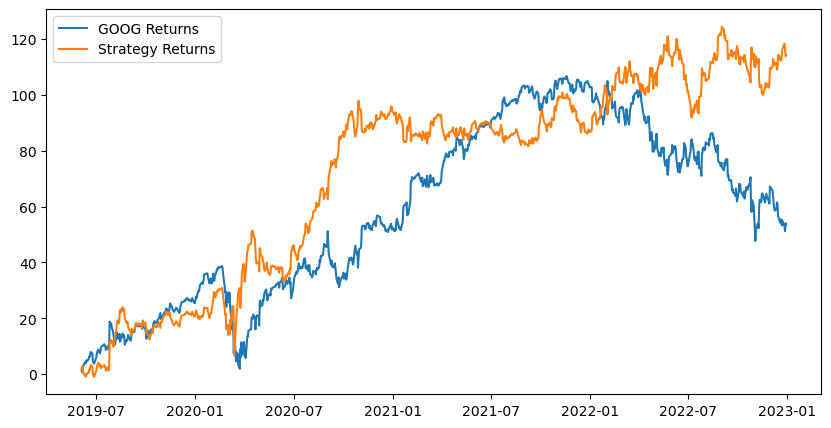

In [ ]:
goog_data['Predicted_Signal']=lm.predict(X)
goog_data['GOOG_Returns']=np.log(goog_data['Close']/
                                goog_data['Close'].shift(1))

cum_goog_return=calculate_return(goog_data,split_value=len(X_train),symbol='GOOG')
cum_strategy_return= calculate_strategy_return(goog_data,split_value=len(X_train), symbol='GOOG')

plot_chart(cum_goog_return, cum_strategy_return,symbol='GOOG')

In [ ]:
accuracy_all = accuracy_score(Y, lm.predict(X))
accuracy_all

0.516500553709856

# DEEP LEARNING

In [ ]:
pip install keras

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'c:\\users\\anyao\\anaconda3\\scripts\\pygmentize.exe'
Consider using the `--user` option or check the permissions.




     ---------------------------------------- 1.0/1.0 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
     -------------------------------------- 240.6/240.6 kB 7.4 MB/s eta 0:00:00
     -------------------------------------- 101.3/101.3 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 87.5/87.5 kB ? eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 12.6 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
